Frank Schiavone
EECE5644 Final Project
Neural Networks

In [3]:
from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import json
from sklearn import metrics
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

c:\users\fr23505\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
# Load Shuffled Dataset
filename_read = r"c:\Users\fr23505\Documents\machine\new_repo\EECE5644-Project-master\shuffled.csv"
df = pd.read_csv(filename_read,na_values=['NA','?'], index_col='Respondent')
df = df.fillna(0)

In [89]:
def hist_plot(pred, y_test): 
    errors = []
    for index in range(len(pred)):
        try:
            errors.append(pred[index][0] - y_test[y_test.index[index]])
        except KeyError:
            pass
             # If we get a key error then we can't compare the prediction and error so we should just continue
    #plt.hist(errors, bins=30, histtype='step')
    #plt.title('Neural Network Results')
    #plt.ylabel('Count')
    #plt.ylabel('Salary Prediction Error')
    #plt.fill(pts[:, 0], pts[:, 1], 'r', lw=2)
    
    plt.show()
    
    plt.figure(figsize=(4, 3))
    plt.title('Neural Net Results')
    plt.xlabel('Salary Prediction Error')
    plt.ylabel('Count')
    plt.hist(errors, bins=20)
    plt.show()

In [91]:
fold=1;
i=2;
# 1/10 of Dataset
test = df.iloc[1 : int(len(df) * 0.1)]

# Seperate Data into train and test
train = df.drop(test.index)

# Seperate targets
x_train = train.drop(columns='Salary')
y_train = train['Salary']
x_test = test.drop(columns='Salary')
y_test = test['Salary']

In [92]:
## Construct NN
activ_func = 'relu'
learn_algo = 'RMSprop'
num_neurons_1 = x_train.shape[1];
num_neurons_2 = round(x_train.shape[1]/2);
model = Sequential()
model.add(Dense(num_neurons_1, input_dim=x_train.shape[1], activation=activ_func))
model.add(Dense(num_neurons_2, activation=activ_func))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=learn_algo)

# Learning Algorithm monitor: Stop training when
# validation loss is less the 1e-3 5 times in a row
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=0, mode='auto')

# Save weights for NN
checkpointer = ModelCheckpoint(filepath="best_weights_strict2.hdf5", verbose=0, save_best_only=True)


In [93]:

# Train NN
# The model will not be trained on this data.
# epochs=1000, Epoch: # complete iterations of the data set to be learned
rms = 0;
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=1,epochs=3000)


Train on 11603 samples, validate on 1288 samples
Epoch 1/3000
11603/11603 [==============================] - 12s 1ms/step - loss: 1583018673.5706 - val_loss: 857409312.9938
Epoch 2/3000
11603/11603 [==============================] - 10s 896us/step - loss: 698730722.7965 - val_loss: 569369240.6460
Epoch 3/3000
11603/11603 [==============================] - 10s 904us/step - loss: 503116242.3690 - val_loss: 477633460.0745
Epoch 4/3000
11603/11603 [==============================] - 10s 862us/step - loss: 426845696.0579 - val_loss: 458113611.5280
Epoch 5/3000
11603/11603 [==============================] - 11s 943us/step - loss: 385985868.9042 - val_loss: 414821232.4969
Epoch 6/3000
11603/11603 [==============================] - 11s 951us/step - loss: 360751542.6507 - val_loss: 386197052.4224
Epoch 7/3000
11603/11603 [==============================] - 11s 941us/step - loss: 342041458.4476 - val_loss: 374946583.8509
Epoch 8/3000
11603/11603 [==============================] - 10s 888us/step - 

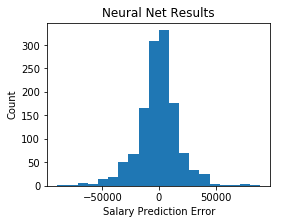

Layer 1 RMS: 18744.743989976276


In [94]:
# Prediction
# load weights from Training NN
model.load_weights('best_weights_strict2.hdf5') 

# Run Prediction
pred = model.predict(x_test)

 # Calculate RMS
rms = np.sqrt(metrics.mean_squared_error(pred,y_test))

# Histogram Plot
hist_plot(pred, y_test)
print("Layer 1 RMS: {}".format(rms))
#print("\nPredicted value: {}".format(pred))
#print("\nActual value: {}".format(y_test))

        
        